<a href="https://colab.research.google.com/github/szh141/Examples/blob/main/transfer_learning_classification_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drlee.io/image-classification-with-transfer-learning-a-comprehensive-guide-with-tensorflow-in-google-colab-143964252590

transfer learning especially important for inadqequate training data

augmentation is another option

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# one copy of cats_and_dogs_filtered.zip in colab images folder
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
data_dir = tf.keras.utils.get_file('cats_and_dogs.zip', origin=dataset_url, extract=True)

68606236/68606236 [==============================] - 1s 0us/step


In [3]:
import os

# Get the directory name of the extracted folder
data_dir = os.path.join(os.path.dirname(data_dir), 'cats_and_dogs_filtered')

# Define the image size and batch size
img_size = (160, 160)
batch_size = 32

# Load the training and validation datasets
train_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

validation_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Found 3000 files belonging to 2 classes.
Using 600 files for validation.


In [4]:
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3),
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [5]:
pretrained_model.trainable = False

In [6]:
model = models.Sequential([
  pretrained_model,
  layers.GlobalAveragePooling2D(),
  layers.Dense(1)
])

In [7]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=validation_dataset)

Epoch 1/10
75/75 [==============================] - 60s 752ms/step - loss: 0.6733 - accuracy: 0.6625 - val_loss: 0.6951 - val_accuracy: 0.6500
Epoch 2/10
75/75 [==============================] - 71s 952ms/step - loss: 0.6626 - accuracy: 0.6650 - val_loss: 0.6887 - val_accuracy: 0.6500
Epoch 3/10
75/75 [==============================] - 57s 755ms/step - loss: 0.6551 - accuracy: 0.6662 - val_loss: 0.6861 - val_accuracy: 0.6517
Epoch 4/10
75/75 [==============================] - 55s 733ms/step - loss: 0.6516 - accuracy: 0.6675 - val_loss: 0.6845 - val_accuracy: 0.6517
Epoch 5/10
75/75 [==============================] - 65s 862ms/step - loss: 0.6484 - accuracy: 0.6671 - val_loss: 0.6828 - val_accuracy: 0.6517
Epoch 6/10
75/75 [==============================] - 64s 855ms/step - loss: 0.6468 - accuracy: 0.6654 - val_loss: 0.6812 - val_accuracy: 0.6500
Epoch 7/10
75/75 [==============================] - 71s 935ms/step - loss: 0.6433 - accuracy: 0.6671 - val_loss: 0.6819 - val_accuracy: 0.6550

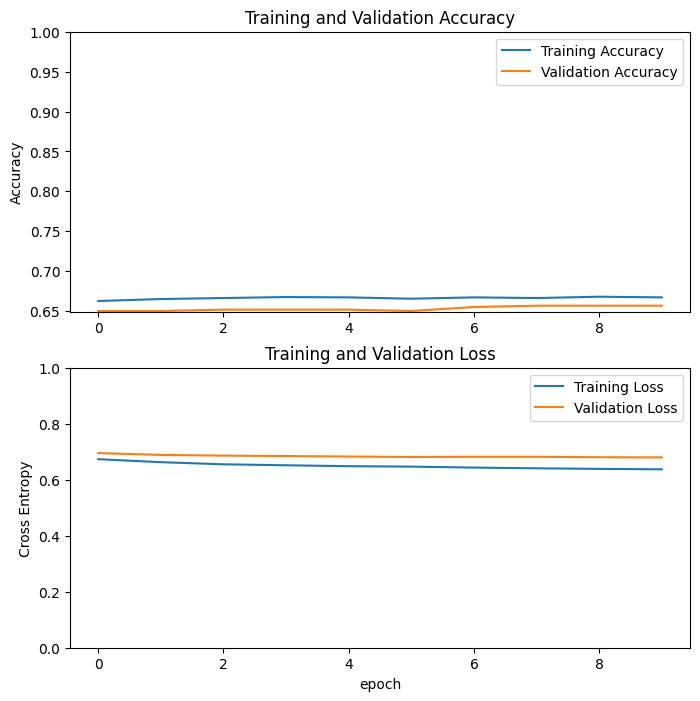

In [10]:
# GPU runtime is probably faster

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()